In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
import time
import scipy.stats
import pandas as pd
import random
import seaborn as sns

### Method Of Moments

In [2]:
x = np.genfromtxt('data/input.csv', delimiter=',')
x.shape

(20000, 9)

In [3]:
simulation = np.genfromtxt('data/output.csv', delimiter=',')
simulation.shape

(20000,)

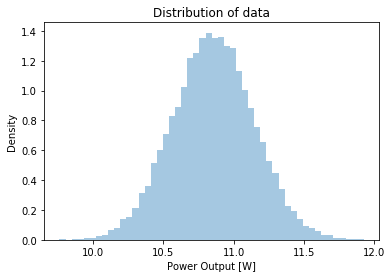

In [4]:
test = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel = "Power Output [W]", label="Density")
test.set_title('Distribution of data')
test.set_ylabel('Density')
plt.savefig('Data/Plots/hist_simulation.png')

In [5]:
from MoM_class import Method_of_Moments

In [6]:
MoM = Method_of_Moments(simulation)

In [7]:
simulation.sort()

In [8]:
dist_names = ['norm', 'beta', 'gamma', 'lognorm']
parameters = []

### Normal Distribution

In [9]:
params_normal = MoM.norm_from_moments()
parameters.append(params_normal)
params_normal

(10.855754143885084, 0.289212270506663)

In [10]:
np.sum(np.log(scipy.stats.norm.pdf(simulation[1:-1], *params_normal)))

-3553.577563013328

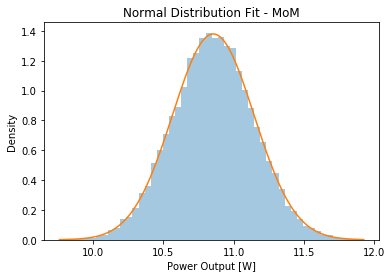

In [11]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Normal.png')

### Beta Distribution

In [12]:
params_beta = MoM.beta_from_moments()
parameters.append(params_beta)
params_beta

(6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)

In [13]:
np.sum(np.log(scipy.stats.beta.pdf(simulation[1:-1], *params_beta)))

-3730.3395271427107

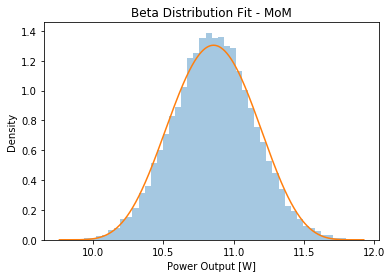

In [14]:
beta_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.beta.pdf(simulation, *params_beta))
beta_fit.set_title('Beta Distribution Fit - MoM')
beta_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Beta.png')

### Gamma Distribution

In [15]:
params_gamma = MoM.gamma_from_moments()
parameters.append(params_gamma)
params_gamma

(14.252039976878569, 9.763923621594225, 0.0766087187562035)

In [16]:
### Log Likelihood
np.sum(np.log(scipy.stats.gamma.pdf(simulation[1:], *params_gamma)))

-4291.132143962901

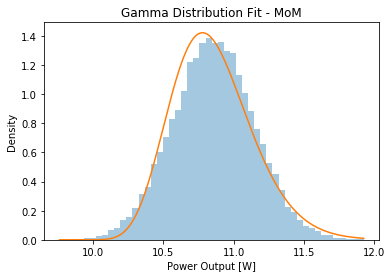

In [17]:
gamma_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.gamma.pdf(simulation, *params_gamma))
gamma_fit.set_title('Gamma Distribution Fit - MoM')
gamma_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Gamma.png')

### LogNormal Distribution

In [18]:
params_lognorm = MoM.lognorm_from_moments()
parameters.append(params_lognorm)
params_lognorm

(0.271691047937462, 9.763923621594225, 1.0522678089321305)

In [19]:
np.sum(np.log(scipy.stats.lognorm.pdf(simulation[1:-1], *params_lognorm)))

-5325.8564613954095

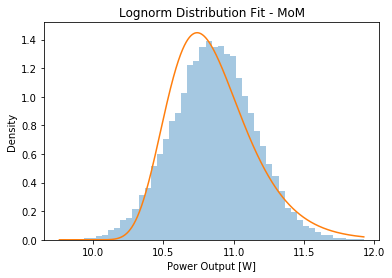

In [20]:
lognorm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
lognorm_fit.set_title('Lognorm Distribution Fit - MoM')
lognorm_fit.set_ylabel('Density')
plt.savefig('Data/Plots/MoM_Lognorm.png')

**Plot Tails**

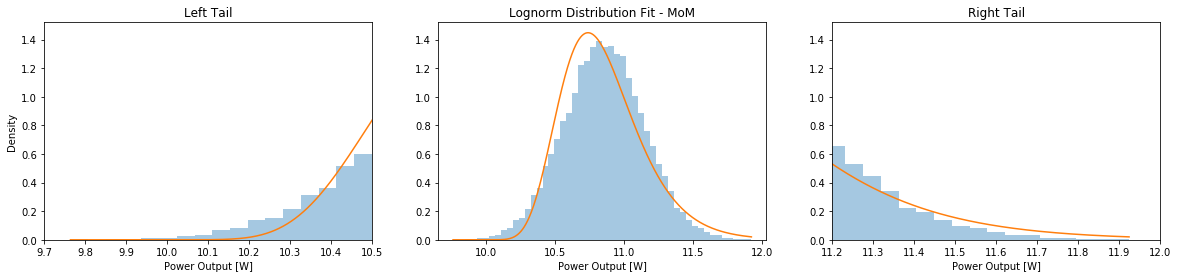

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,4))
# Central Plot - Full Distribution
normal_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax2)
ax2.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
normal_fit.set_title('Lognorm Distribution Fit - MoM')

# Left Plot - Left Tail
left_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax1)
ax1.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
left_tail.set_title('Left Tail')
left_tail.set_ylabel('Density')
ax1.set_xlim([9.7, 10.5])

# Right Plot - Right Tail
right_tail = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]',  ax=ax3)
ax3.plot(simulation, scipy.stats.lognorm.pdf(simulation, *params_lognorm))
right_tail.set_title('Right Tail')
ax3.set_xlim([11.2, 12])
plt.savefig('Data/Plots/MoM_lognorm.png')
plt.show()

**Plot Tolerance Limits**

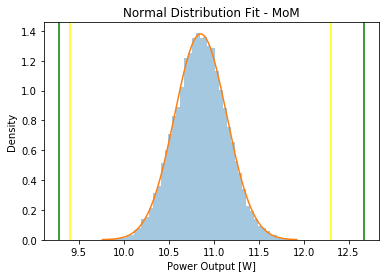

In [22]:
norm_fit = sns.distplot(a = simulation, kde = False, norm_hist=True, axlabel='Power Output [W]')
plt.plot(simulation, scipy.stats.norm.pdf(simulation, *params_normal))
norm_fit.set_title('Normal Distribution Fit - MoM')
norm_fit.set_ylabel('Density')
plt.axvline(x=9.28592305, color='green')
plt.axvline(x=12.66975792, color='green')
plt.axvline(x=9.4, color='yellow')
plt.axvline(x=12.3, color='yellow')
plt.savefig('Data/Plots/CP.png')
plt.show()


**Chi-Square Test**

In [23]:
from helper_functions import compute_chi_square

In [24]:
results = compute_chi_square(simulation, 'MoM')

Distribution: norm || Parameters: (10.855754143885084, 0.289212270506663)|| Log-likelihood: -3553.577563013328

Distribution: beta || Parameters: (6.543229995890743, 6.402685874570016, 9.763923621594225, 2.1602092690086625)|| Log-likelihood: -3730.3395271427107

Distribution: gamma || Parameters: (14.252039976878569, 9.763923621594225, 0.0766087187562035)|| Log-likelihood: -4286.5445597511325

Distribution: lognorm || Parameters: (0.271691047937462, 9.763923621594225, 1.0522678089321305)|| Log-likelihood: -5325.8564613954095


Distributions listed by Goodness of Fit:
..........................................
  Distribution  Log_likelihood  Chi_square  \
0         norm    -3553.577563    0.376370   
1         beta    -3730.339527   27.946898   
2        gamma    -4286.544560  242.246166   
3      lognorm    -5325.856461  553.603727   

                                          Parameters  
0            (10.855754143885084, 0.289212270506663)  
1  (6.543229995890743, 6.402685874570016, 

**QQ-Plot**

In [25]:
from helper_functions import qqplot

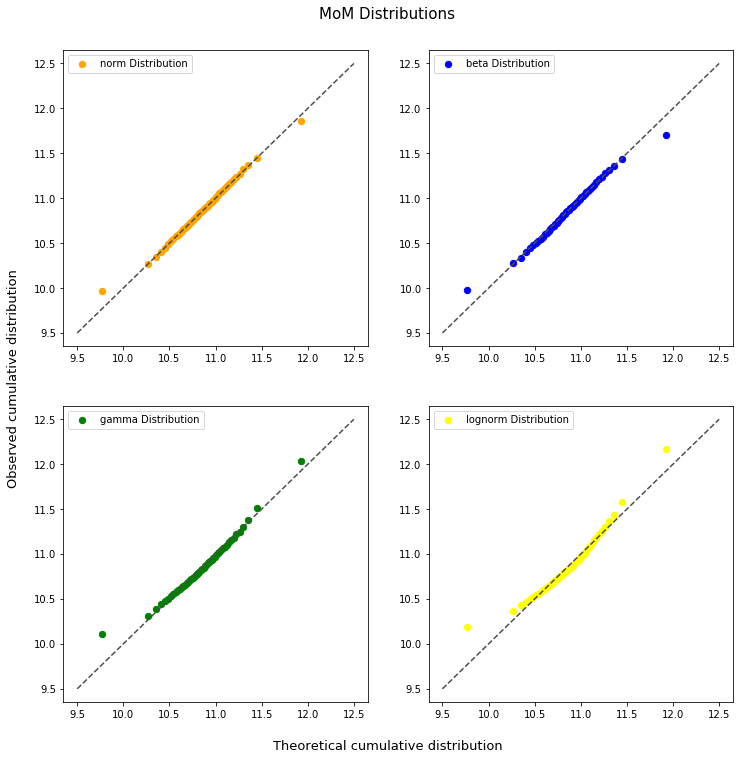

In [26]:
qqplot(simulation, results, 4,"MoM Distributions", "MoM_qq")

In [27]:
results
results.to_csv('Data/MoM_table.csv',header=None, index=None)